In [1]:
import pandas as pd
import numpy as np
import nltk
import string, re, unicodedata
import emoji
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uhamz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\uhamz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uhamz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
data = pd.read_csv('tweets.csv')
data.head()

,tweet_count,user_id,username,text,created_at
0,1,1158355819512991747,Narasi Newsroom,Korban meninggal dunia akibat banjir dan longs...,Sat Dec 20 02:20:53 +0000 2025
1,2,9688522,Aceh 🇮🇩🇹🇷🇵🇸,26 Nov 2025 — Aceh dilanda banjir dahsyat. Gel...,Fri Dec 19 19:55:57 +0000 2025
2,3,1158355819512991747,Narasi Newsroom,Badan Nasional Penanggulangan Bencana (BNPB) m...,Mon Dec 15 03:19:01 +0000 2025
3,4,9688522,Aceh 🇮🇩🇹🇷🇵🇸,Wartawan Asing dan @CNNIndonesia Benar tentang...,Fri Dec 19 05:48:52 +0000 2025
4,5,1038483432391634944,Romitsu Top,"Kalau tak ada yg dihukum penjara pengusaha, pe...",Fri Dec 12 23:55:21 +0000 2025


In [4]:
df = data["text"]
df.head()

0    Korban meninggal dunia akibat banjir dan longs...
1    26 Nov 2025 — Aceh dilanda banjir dahsyat. Gel...
2    Badan Nasional Penanggulangan Bencana (BNPB) m...
3    Wartawan Asing dan @CNNIndonesia Benar tentang...
4    Kalau tak ada yg dihukum penjara pengusaha, pe...
Name: text, dtype: object

In [5]:
STOPWORDS = set(stopwords.words('indonesian'))
ADDITIONAL_STOPWORDS = {
    'banjir', 'sumatera', 'bencana', 'indonesia', 'amp', 'byk',
    'ya', 'rp', 'nya', 'dgn'
}
STOPWORDS.update(ADDITIONAL_STOPWORDS)

NORMALIZATION_DICT = {
    "yg": "yang",
    "gimana": "bagaimana",
    "nggak": "tidak",
    "gak": "tidak",
    "ga": "tidak",
    "klo": "kalau",
    "kalo": "kalau",
    "sdh": "sudah",
    "udh": "sudah",
    "blm": "belum",
    "krn": "karena",
    "jd": "jadi",
    "jgn": "jangan",
    "gw": "saya",
    "aku": "saya",
    "bgt": "banget",
    "dtg": "datang",
    "tlg": "tolong",
    "aja": "saja",
    "dgn": "dengan",
    "nov" : "november",
    "des" : "desember",
}

In [6]:
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [w for w in word_tokens if w.lower() not in STOPWORDS]
    return ' '.join(filtered_text)

def remove_short_sentences(text):
    words = text.split()
    return "" if len(words) <= 1 else text

def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

def normalize_slang(text):
    if not text or not isinstance(text, str):
        return ""
        
    words = text.split()
    normalized_words = []
    
    for word in words:
        replacement = NORMALIZATION_DICT.get(word, word)
        if not isinstance(replacement, str):
            replacement = str(word)
            
        normalized_words.append(replacement)
    
    return " ".join(normalized_words)

def preprocessing(text):
    text = str(text).lower()
    
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emoji(text)

    text = re.sub(r'[^\w\s]', '', text)

    text = normalize_slang(text) 
    
    text = remove_stopwords(text)
    text = remove_short_sentences(text)
    
    return text

In [7]:
df_cleaned = df.apply(preprocessing)
print(df_cleaned.head())

0    korban meninggal dunia akibat longsor aceh uta...
1    26 november 2025 aceh dilanda dahsyat gelondon...
2    badan nasional penanggulangan bnpb merilis dat...
3    wartawan asing aceh terbukti ribuan bayi pengu...
4    dihukum penjara pengusaha pejabat menyebabkan ...
Name: text, dtype: object


In [9]:
import gensim

def tokenize(text):
    return gensim.utils.simple_preprocess(text)

df_tokenized = df_cleaned.apply(tokenize)
print(df_tokenized.head())


0    [korban, meninggal, dunia, akibat, longsor, ac...
1    [november, aceh, dilanda, dahsyat, gelondongan...
2    [badan, nasional, penanggulangan, bnpb, merili...
3    [wartawan, asing, aceh, terbukti, ribuan, bayi...
4    [dihukum, penjara, pengusaha, pejabat, menyeba...
Name: text, dtype: object


In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df_stemmed = df_tokenized.apply(lambda tokens: [stemmer.stem(token) for token in tokens])
print(df_stemmed.head())

0    [korban, tinggal, dunia, akibat, longsor, aceh...
1    [november, aceh, landa, dahsyat, gelondong, ka...
2    [badan, nasional, tanggulang, bnpb, rilis, dat...
3    [wartawan, asing, aceh, bukti, ribu, bayi, ung...
4    [hukum, penjara, usaha, jabat, sebab, bandang,...
Name: text, dtype: object


In [11]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(df_stemmed)
corpus = [id2word.doc2bow(text) for text in df_stemmed]

**Optimization**

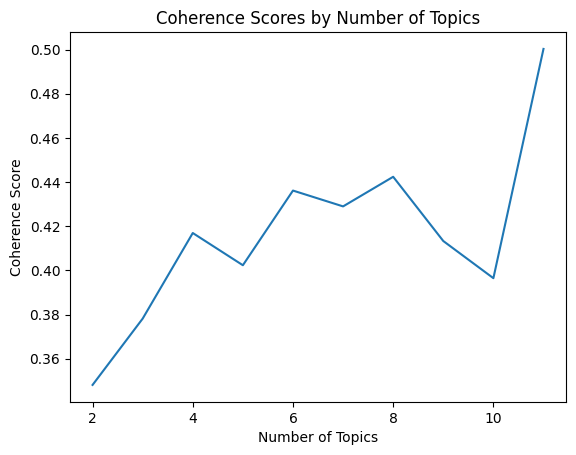

In [13]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel, CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_stemmed, start=2, limit=12, step=1)

x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores by Number of Topics")
plt.show()

In [14]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=5,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='auto',
                                    per_word_topics=True)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

coherence_model_lda = CoherenceModel(model=lda_model, texts=df_stemmed, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.018*"rakyat" + 0.018*"usaha" + 0.014*"deforestasi" + 0.013*"bandang" + 0.013*"pimpin" + 0.011*"prabowo" + 0.010*"temu" + 0.010*"kuasa" + 0.010*"papua" + 0.010*"presiden"')
(1, '0.018*"bandang" + 0.016*"hutan" + 0.016*"rumah" + 0.012*"dampak" + 0.011*"kayu" + 0.011*"drone" + 0.010*"hilang" + 0.010*"rusa" + 0.010*"data" + 0.010*"perintah"')
(2, '0.044*"aceh" + 0.036*"longsor" + 0.031*"korban" + 0.030*"bantu" + 0.025*"barat" + 0.022*"utara" + 0.021*"wilayah" + 0.019*"dampak" + 0.018*"tangan" + 0.013*"perintah"')
(3, '0.020*"baik" + 0.019*"kait" + 0.018*"korban" + 0.014*"baca" + 0.012*"bantu" + 0.012*"tetap" + 0.009*"muhammadiyah" + 0.009*"nasional" + 0.009*"dpr" + 0.008*"media"')
(4, '0.034*"tanah" + 0.016*"video" + 0.015*"turun" + 0.012*"korban" + 0.011*"air" + 0.011*"prabowo" + 0.010*"duga" + 0.010*"capai" + 0.008*"badan" + 0.008*"presiden"')

Coherence Score:  0.40233765283288053


In [16]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, id2word)

lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.251845 -0.036929       1        1  33.761099
1     -0.005911  0.226487       2        1  19.316044
0     -0.131712  0.006894       3        1  17.913279
4     -0.086146 -0.103868       4        1  14.516641
3     -0.028076 -0.092585       5        1  14.492938, topic_info=         Term        Freq       Total Category  logprob  loglift
0        aceh  127.000000  127.000000  Default  30.0000  30.0000
153     tanah   40.000000   40.000000  Default  29.0000  29.0000
4       barat   68.000000   68.000000  Default  28.0000  28.0000
11    longsor  109.000000  109.000000  Default  27.0000  27.0000
86    wilayah   58.000000   58.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
9      korban   21.137515  136.127465   Topic5  -4.0237   0.0690
71      bantu   14.430438  101.333907   Topic5  -4.4054  -0.0176
12   nasional   10.376849   38.888005   Topic5  -4.7352   0.6104
212    donasi    7.023160   12.787354   Topic5  -5.1255   1.3323
299    negara    7.038859   20.827057   Topic5  -5.1233   0.8467

[242 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.941882     aceh
0         2  0.023547     aceh
0         3  0.015698     aceh
0         5  0.015698     aceh
522       4  0.934191      air
...     ...       ...      ...
807       3  0.717336      utk
667       4  0.945621    video
85        1  0.663347    warga
85        2  0.318406    warga
86        1  0.993339  wilayah

[263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

**Parameter Tuning**

In [17]:
import numpy as np
import pandas as pd
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import tqdm

def hyperparameter_tuning(corpus, dictionary, texts, k_range, alpha_range, beta_range):
    model_results = {
        'num_topics': [],
        'alpha': [],
        'beta': [],
        'coherence': []
    }
    
    total_iterations = len(k_range) * len(alpha_range) * len(beta_range)
    pbar = tqdm.tqdm(total=total_iterations)

    for k in k_range:
        for alpha in alpha_range:
            for beta in beta_range:
                
                lda_model = LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=k,
                                     alpha=alpha,
                                     eta=beta,
                                     random_state=42,
                                     passes=5)
                
                cv_model = CoherenceModel(model=lda_model, 
                                          texts=texts, 
                                          dictionary=dictionary, 
                                          coherence='c_v')
                score = cv_model.get_coherence()
                
                model_results['num_topics'].append(k)
                model_results['alpha'].append(alpha)
                model_results['beta'].append(beta)
                model_results['coherence'].append(score)
                
                pbar.update(1)
    
    pbar.close()
    return pd.DataFrame(model_results)

min_topics = 3
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

alpha_list = ['symmetric', 'asymmetric', 0.01, 0.5]
beta_list = ['auto', 0.01, 0.1]

results_df = hyperparameter_tuning(corpus, id2word, df_stemmed, 
                                   topics_range, alpha_list, beta_list)

best_result = results_df.sort_values(by='coherence', ascending=False).head(1)
print("Best Model Parameters:")
print(best_result)

results_df.to_csv('lda_tuning_results.csv', index=False)

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████| 84/84 [21:00<00:00, 15.01s/it]

Best Model Parameters:
    num_topics       alpha  beta  coherence
51           7  asymmetric  auto   0.407836


**Parameter Test**

In [21]:
lda_model_tuned = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=7,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=100,
                                    passes=10,
                                    alpha='asymmetric',
                                    per_word_topics=True)

topics = lda_model_tuned.print_topics(num_words=10)
for topic in topics:
    print(topic)

coherence_model_lda = CoherenceModel(model=lda_model_tuned, texts=df_stemmed, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.029*"korban" + 0.019*"usaha" + 0.018*"rakyat" + 0.016*"bandang" + 0.015*"cepat" + 0.013*"wilayah" + 0.013*"deforestasi" + 0.012*"pimpin" + 0.012*"prabowo" + 0.012*"turun"')
(1, '0.025*"perintah" + 0.018*"pulih" + 0.016*"bantu" + 0.015*"warga" + 0.014*"dampak" + 0.013*"barat" + 0.011*"presiden" + 0.011*"aceh" + 0.011*"rusak" + 0.011*"tanda"')
(2, '0.040*"aceh" + 0.033*"longsor" + 0.028*"utara" + 0.026*"barat" + 0.025*"tangan" + 0.021*"wilayah" + 0.020*"korban" + 0.017*"bantu" + 0.016*"sumatra" + 0.013*"darurat"')
(3, '0.034*"korban" + 0.023*"bantu" + 0.022*"baik" + 0.021*"aceh" + 0.020*"kait" + 0.019*"total" + 0.016*"utara" + 0.015*"longsor" + 0.015*"baca" + 0.014*"bnpb"')
(4, '0.043*"tanah" + 0.024*"hutan" + 0.020*"video" + 0.019*"drone" + 0.018*"data" + 0.015*"tera" + 0.013*"duga" + 0.013*"izin" + 0.012*"sebab" + 0.012*"kebun"')
(5, '0.022*"dampak" + 0.019*"kuasa" + 0.018*"rumah" + 0.017*"orang" + 0.013*"huni" + 0.013*"tim" + 0.013*"bandang" + 0.012*"sorot" + 0.012*"unit" + 0.0

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model_tuned, corpus, id2word)

lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.103982 -0.184262       1        1  22.019975
2     -0.147270  0.070418       2        1  18.318564
1     -0.047211 -0.084304       3        1  18.156036
3     -0.099638  0.186807       4        1  13.640982
4      0.212747  0.035701       5        1  10.764511
5      0.054489 -0.018805       6        1   8.764390
6      0.130864 -0.005556       7        1   8.335541, topic_info=        Term        Freq       Total Category  logprob  loglift
153    tanah   38.000000   38.000000  Default  30.0000  30.0000
18     utara   61.000000   61.000000  Default  29.0000  29.0000
9     korban  133.000000  133.000000  Default  28.0000  28.0000
102   tangan   52.000000   52.000000  Default  27.0000  27.0000
0       aceh  118.000000  118.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
92      hari    2.872763    3.568872   Topic7  -5.4663   2.2677
21      alam    6.899253   14.570793   Topic7  -4.5902   1.7370
30     hutan    9.266017   41.534547   Topic7  -4.2953   0.9845
59   bandang   12.175709   83.283832   Topic7  -4.0222   0.5618
56      ribu    6.152070   20.265874   Topic7  -4.7048   1.2925

[334 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.126154     aceh
0         2  0.504618     aceh
0         3  0.134565     aceh
0         4  0.193437     aceh
0         7  0.033641     aceh
...     ...       ...      ...
85        7  0.027049    warga
19        4  0.918340      wib
86        1  0.423400  wilayah
86        2  0.564534  wilayah
1099      6  0.799329  yayasan

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5, 6, 7])